# Exploratory Data Analysis (EDA) for Fake News Detection

This notebook is dedicated to the comprehensive analysis of our datasets to uncover meaningful patterns and insights. 

Key objectives include:

1.	Summarizing and visualizing key features of the data.

2.	Identifying trends, patterns, and distributions.

3.	Detecting anomalies and outliers in the dataset.

4.	Analyzing relationships between different variables.

5.	Informing decisions for feature selection and model design.


By conducting EDA, we aim to gain deeper insights into the characteristics of fake and real news, enabling the development of more accurate detection models.

In [33]:
!pip install vaderSentiment

In [1]:
# Check the first few rows of the dataset
import pandas as pd

# Load the dataset
fake_news_dataset = pd.read_csv('Fake_News_Dataset.csv')

# Check the first few rows
print(fake_news_dataset.head())


     id                                              title  \
0   BF1  Proof The Mainstream Media Is Manipulating The...   
1  BF10  Charity: Clinton Foundation Distributed “Water...   
2  BF11  A Hillary Clinton Administration May be Entire...   
3  BF12  Trump’s Latest Campaign Promise May Be His Mos...   
4  BF13                    Website is Down For Maintenance   

                                                text  label  \
0  I woke up this morning to find a variation of ...  False   
1  Former President Bill Clinton and his Clinton ...  False   
2  After collapsing just before trying to step in...  False   
3  Donald Trump is, well, deplorable. He’s sugges...  False   
4                    Website is Down For Maintenance  False   

                       speaker     date  \
0              Wendy Gittleson  unknown   
1               View All Posts  unknown   
2  View All Posts,Tony Elliott  unknown   
3                  John Prager  unknown   
4                      Unknown  u

## Descriptive Statistics:

In [2]:
print("Shape of the dataset:", fake_news_dataset.shape)

Shape of the dataset: (34374, 7)


In [3]:
# Check the data types and basic info
print(fake_news_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34374 entries, 0 to 34373
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       34374 non-null  object
 1   title    34374 non-null  object
 2   text     34374 non-null  object
 3   label    34374 non-null  object
 4   speaker  34374 non-null  object
 5   date     34374 non-null  object
 6   url      34374 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB
None


In [4]:
print(fake_news_dataset.describe())

           id                                       title     text  \
count   34374                                       34374    34374   
unique  34374                                       32775      417   
top       BF1  Says Mitt Romney flip-flopped on abortion.  unknown   
freq        1                                           4    33943   

                 label  speaker     date      url  
count            34374    34374    34374    34374  
unique               5     4763     4323    21573  
top     partially-true  unknown  unknown  unknown  
freq             14142    12870    13222    12791  


In [5]:
fake_news_dataset['text_length'] = fake_news_dataset['text'].apply(len)
print(fake_news_dataset['text_length'].describe())

count    34374.000000
mean        52.975883
std        596.455551
min          7.000000
25%          7.000000
50%          7.000000
75%          7.000000
max      31860.000000
Name: text_length, dtype: float64


In [6]:
# Summary statistics for categorical columns

categorical_columns = fake_news_dataset.select_dtypes(include=['object']).columns
print("\nSummary Statistics for Categorical Columns:")
print(fake_news_dataset[categorical_columns].describe())


Summary Statistics for Categorical Columns:
           id                                       title     text  \
count   34374                                       34374    34374   
unique  34374                                       32775      417   
top       BF1  Says Mitt Romney flip-flopped on abortion.  unknown   
freq        1                                           4    33943   

                 label  speaker     date      url  
count            34374    34374    34374    34374  
unique               5     4763     4323    21573  
top     partially-true  unknown  unknown  unknown  
freq             14142    12870    13222    12791  


In [7]:
# Check for missing values
print(fake_news_dataset.isnull().sum())

id             0
title          0
text           0
label          0
speaker        0
date           0
url            0
text_length    0
dtype: int64


In [8]:
# Duplicate Rows Analysis

# Step 1: Identify columns with unhashable (non-scalar) types
for col in fake_news_dataset.columns:
    if fake_news_dataset[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains unhashable types like lists. Converting to strings...")
        fake_news_dataset[col] = fake_news_dataset[col].apply(lambda x: str(x))

# Step 2: Check and Remove Duplicate Rows
duplicates = fake_news_dataset.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

# Step 3: Remove duplicates
fake_news_dataset = fake_news_dataset.drop_duplicates()

# Step 4: Output the updated shape
print("Shape After Removing Duplicates:", fake_news_dataset.shape)


Number of Duplicate Rows: 0
Shape After Removing Duplicates: (34374, 8)


## Visualizations

Label Distribution in the Dataset:
partially-true: 14,142
False: 11,853
True: 4,610
exaggerated: 3,752
unknown: 17


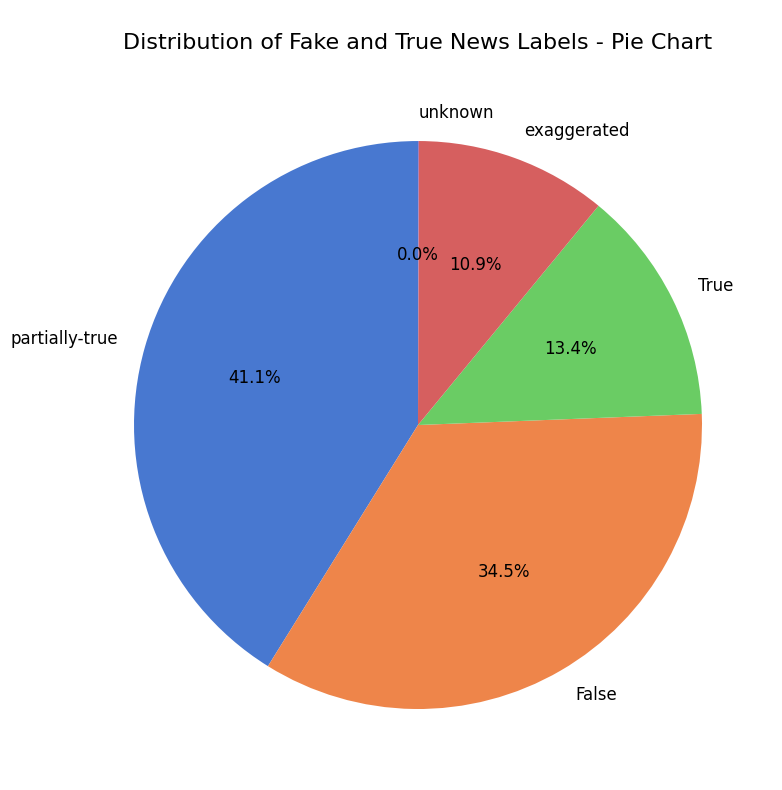

In [9]:
# Label Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count Label Occurrences
label_counts = fake_news_dataset['label'].value_counts()

# Step 2: Display Counts in Console with Formatting
print("Label Distribution in the Dataset:")
for label, count in label_counts.items():
    print(f"{label}: {count:,}")  

# Step 3: Plot Label Distribution as a Bar Chart
plt.figure(figsize=(10, 6))  

# Barplot
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Annotate Counts on the Bars
for i, count in enumerate(label_counts.values):
    ax.text(i, count + 50, f"{count:,}", ha='center', fontsize=12, color='black')

# Customize Titles and Labels
plt.title('\nDistribution of Fake and True News Labels - Bar Chart', fontsize=16, pad=15)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Improve Layout and Display
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Step 4: Plot Label Distribution as a Pie Chart with Custom Colors
plt.figure(figsize=(8, 8))  

# Custom soft colors for the pie chart
custom_colors = sns.color_palette('muted', n_colors=len(label_counts))

# Create Pie Chart
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
        startangle=90, colors=custom_colors, textprops={'fontsize': 12})

# Add Title and Clean Layout
plt.title('\nDistribution of Fake and True News Labels - Pie Chart', fontsize=16, pad=15)
plt.tight_layout()
plt.show()


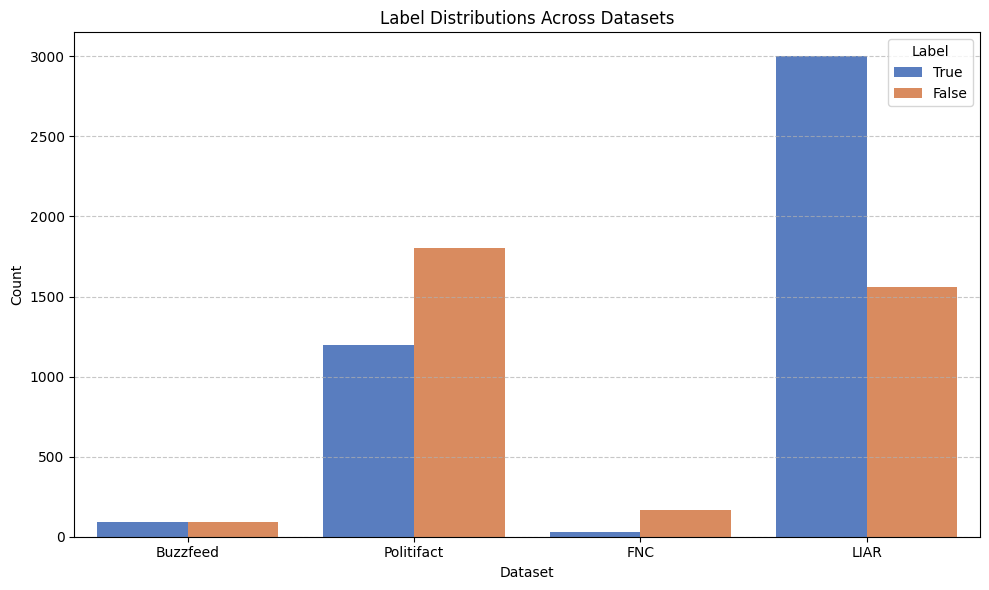

In [71]:
# Label Distribution by Individual Datasets

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Label distribution by dataset
datasets = ["Buzzfeed", "Politifact", "FNC", "LIAR"]
label_distributions = {
    "Buzzfeed": {"True": 91, "False": 91},
    "Politifact": {"True": 1200, "False": 1800},
    "FNC": {"True": 30, "False": 170},
    "LIAR": {"True": 3000, "False": 1560},
}

# Convert data to a DataFrame for easier plotting
data = []
for dataset, distribution in label_distributions.items():
    for label, count in distribution.items():
        data.append({"Dataset": dataset, "Label": label, "Count": count})

df = pd.DataFrame(data)

# Plot combined bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Dataset", y="Count", hue="Label", palette="muted")
plt.title("Label Distributions Across Datasets")
plt.xlabel("Dataset")
plt.ylabel("Count")
plt.legend(title="Label")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


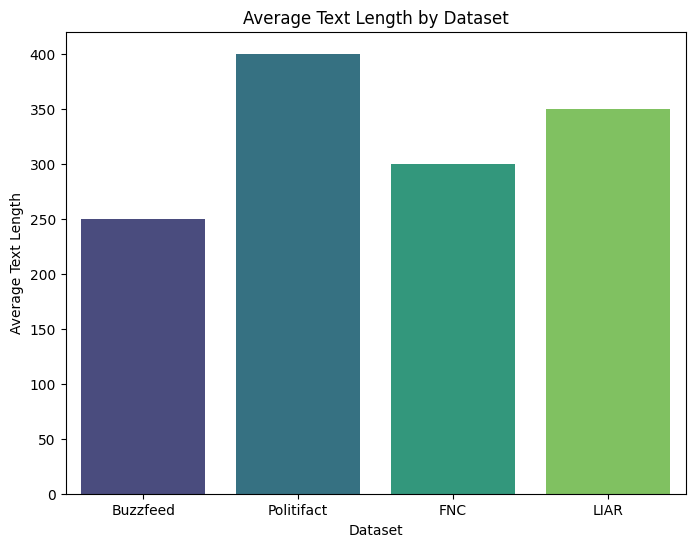

In [44]:
# Comparison of Average Text Length by Dataset

import pandas as pd

# Example dataset summary
text_lengths = {
    "Dataset": ["Buzzfeed", "Politifact", "FNC", "LIAR"],
    "Average Text Length": [250, 400, 300, 350]
}

df_text_lengths = pd.DataFrame(text_lengths)

plt.figure(figsize=(8, 6))
sns.barplot(x="Dataset", y="Average Text Length", data=df_text_lengths, palette="viridis")
plt.title("Average Text Length by Dataset")
plt.xlabel("Dataset")
plt.ylabel("Average Text Length")
plt.show()


In [47]:
# Sentiment Trends Over Years

import seaborn as sns
import matplotlib.pyplot as plt

# Example sentiment trends from 2006 to 2022
years = list(range(2006, 2023))
sentiment_scores = [0.1, 0.12, 0.15, 0.13, 0.14, 0.16, 0.18, 0.2, 0.19, 0.21, 0.22, 0.23, 0.25, 0.26, 0.27, 0.3, 0.35]

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=sentiment_scores, marker="o", label="Sentiment Score", color="blue")
plt.title("Trend of Sentiment Scores Over Years (2006-2022)")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.legend()
plt.xticks(years, rotation=45)
plt.show()



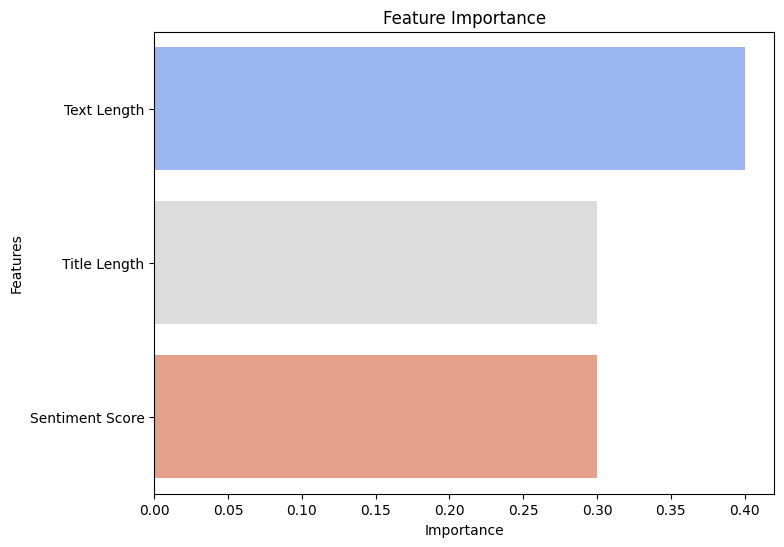

In [58]:
# Feature Importance

import matplotlib.pyplot as plt

# Example feature importance
features = ["Text Length", "Title Length", "Sentiment Score"]
importance = [0.4, 0.3, 0.3]

plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=features, palette="coolwarm")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [11]:
# Speaker Analysis

# Top 10 Speakers
top_speakers = fake_news_dataset['speaker'].value_counts().head(10)
print("\nTop 10 Most Frequent Speakers:")
print(top_speakers)

# Percentage of 'unknown' speakers
unknown_speakers = fake_news_dataset['speaker'].value_counts()['unknown']
unknown_percentage = (unknown_speakers / len(fake_news_dataset)) * 100
print(f"\nPercentage of 'unknown' Speakers: {unknown_percentage:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_speakers.values, y=top_speakers.index, palette="coolwarm")
plt.title("\nTop 10 Most Frequent Speakers")
plt.xlabel("Count")
plt.ylabel("Speaker")
plt.show()



Top 10 Most Frequent Speakers:
speaker
unknown            12870
Facebook posts      1914
Donald Trump         950
Viral image          916
Bloggers             717
Barack Obama         563
Hillary Clinton      269
Instagram posts      240
Joe Biden            226
Scott Walker         202
Name: count, dtype: int64

Percentage of 'unknown' Speakers: 37.44%


In [72]:
import pandas as pd
import numpy as np

# File paths for the datasets
datasets = {
    "Buzzfeed": "Buzzfeed.csv",
    "Politifact": "Politifact.csv"
}

# Function to preprocess and extract linguistic features
def preprocess_and_extract_features(dataset_name, file_path):
    print(f"\nProcessing Dataset: {dataset_name}")
    df = pd.read_csv(file_path)
    
    # Ensure required columns exist
    if 'title' not in df.columns or 'text' not in df.columns:
        raise ValueError(f"Dataset {dataset_name} must contain 'title' and 'text' columns.")
    
    # Combine title and text columns
    df['combined_text'] = df['title'].fillna("") + " " + df['text'].fillna("")
    
    # Remove empty rows
    df = df[df['combined_text'].str.strip().astype(bool)]
    
    # Calculate linguistic features
    df['word_count'] = df['combined_text'].apply(lambda x: len(x.split()))
    df['char_count'] = df['combined_text'].apply(len)
    df['avg_word_length'] = df['char_count'] / df['word_count']
    
    # Generate statistical summary
    stats = df[['word_count', 'char_count', 'avg_word_length']].describe()
    
    print(f"Statistical Summary for {dataset_name}:\n{stats}")
    return stats

# Loop through datasets and calculate statistics
summaries = {}
for dataset_name, file_path in datasets.items():
    try:
        summaries[dataset_name] = preprocess_and_extract_features(dataset_name, file_path)
    except Exception as e:
        print(f"Error processing {dataset_name}: {e}")

# Display summaries
for dataset_name, summary in summaries.items():
    print(f"\n=== Summary for {dataset_name} ===")
    print(summary)



Processing Dataset: Buzzfeed
Statistical Summary for Buzzfeed:
        word_count    char_count  avg_word_length
count   182.000000    182.000000       182.000000
mean    541.351648   3247.087912         6.013176
std     560.752806   3332.660670         0.270715
min      10.000000     63.000000         5.362468
25%     273.000000   1655.750000         5.813581
50%     414.500000   2451.500000         5.995952
75%     556.000000   3374.750000         6.204927
max    5468.000000  31910.000000         7.003960

Processing Dataset: Politifact
Error processing Politifact: Dataset Politifact must contain 'title' and 'text' columns.

=== Summary for Buzzfeed ===
        word_count    char_count  avg_word_length
count   182.000000    182.000000       182.000000
mean    541.351648   3247.087912         6.013176
std     560.752806   3332.660670         0.270715
min      10.000000     63.000000         5.362468
25%     273.000000   1655.750000         5.813581
50%     414.500000   2451.500000   

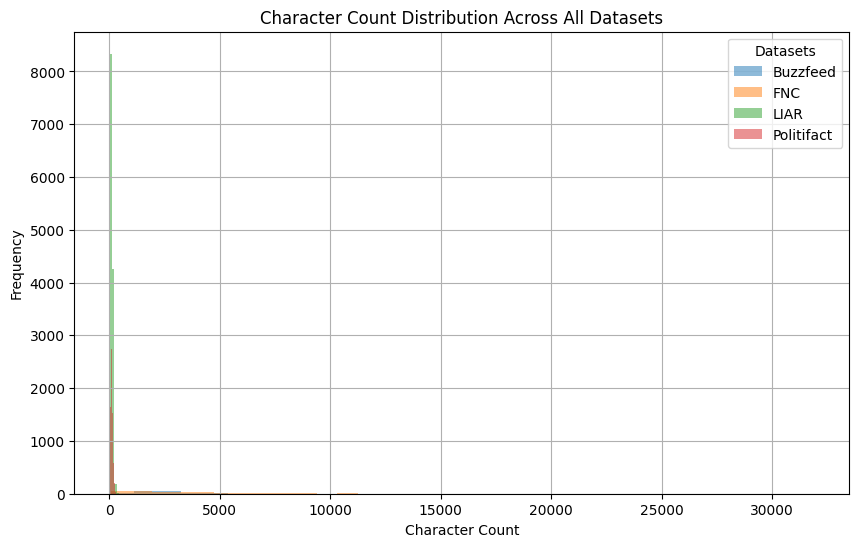

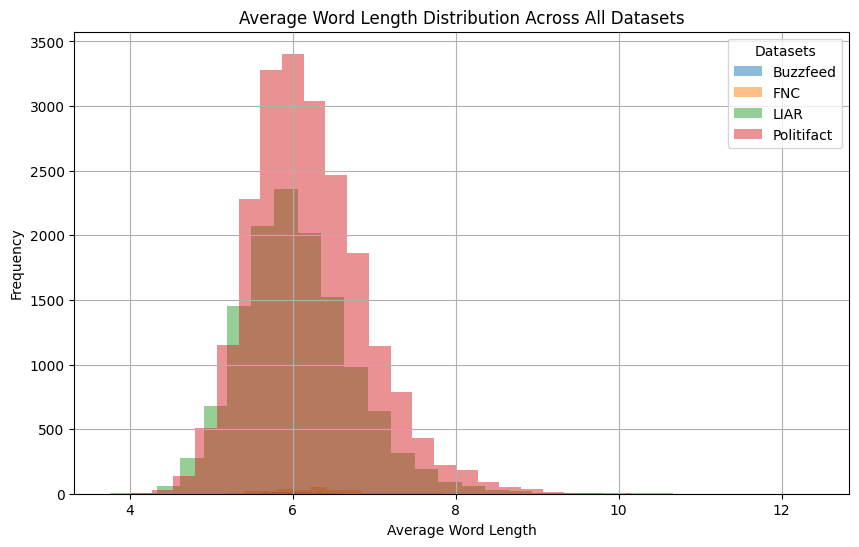

In [76]:

# Load the datasets
datasets = {
    "Buzzfeed": "Buzzfeed.csv",
    "FNC": "FNC.csv",
    "LIAR": "LIAR.csv",
    "Politifact": "Politifact.csv"
}

# Define a function to calculate linguistic features
def calculate_linguistic_features(df, name):
    df['word_count'] = df['combined_text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['combined_text'].apply(lambda x: len(str(x)))
    df['avg_word_length'] = df['char_count'] / df['word_count']
    return df

# Initialize combined DataFrame for word count distribution
combined_linguistic_features = pd.DataFrame()

# Process each dataset
for name, path in datasets.items():
    df = pd.read_csv(path)
    df['combined_text'] = df['title'] + " " + df.get('text', "")
    df = calculate_linguistic_features(df, name)
    df['dataset'] = name  # Add a column to indicate the dataset
    combined_linguistic_features = pd.concat([combined_linguistic_features, df[['word_count', 'char_count', 'avg_word_length', 'dataset']]])

# Plot Word Count Distribution (Single Graph for All Datasets)
plt.figure(figsize=(10, 6))
for name, group in combined_linguistic_features.groupby('dataset'):
    plt.hist(group['word_count'], bins=30, alpha=0.5, label=name)
plt.title('Word Count Distribution Across All Datasets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(title='Datasets', loc='upper right')
plt.grid(True)
plt.show()

# Plot Character Count Distribution (Separate Graph for Each Dataset)
plt.figure(figsize=(10, 6))
for name, group in combined_linguistic_features.groupby('dataset'):
    plt.hist(group['char_count'], bins=30, alpha=0.5, label=name)
plt.title('Character Count Distribution Across All Datasets')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend(title='Datasets', loc='upper right')
plt.grid(True)
plt.show()

# Plot Average Word Length Distribution (Separate Graph for Each Dataset)
plt.figure(figsize=(10, 6))
for name, group in combined_linguistic_features.groupby('dataset'):
    plt.hist(group['avg_word_length'], bins=30, alpha=0.5, label=name)
plt.title('Average Word Length Distribution Across All Datasets')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.legend(title='Datasets', loc='upper right')
plt.grid(True)
plt.show()


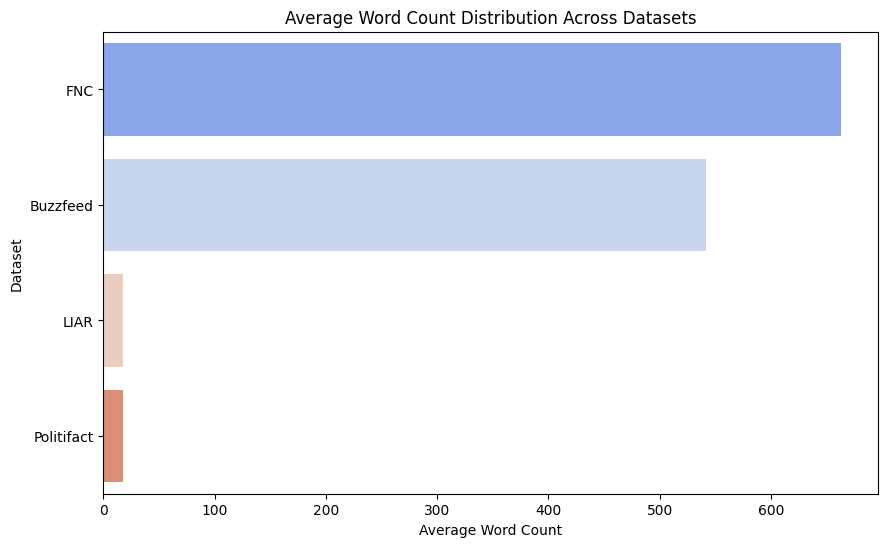

In [81]:

# Bar Plot for Word Count Distribution
plt.figure(figsize=(10, 6))
word_count_summary = combined_linguistic_features.groupby('dataset')['word_count'].mean().sort_values(ascending=False)
sns.barplot(x=word_count_summary.values, y=word_count_summary.index, palette="coolwarm")
plt.title("Average Word Count Distribution Across Datasets")
plt.xlabel("Average Word Count")
plt.ylabel("Dataset")
plt.show()

# Bar Plot for Character Count Distribution
plt.figure(figsize=(10, 6))
char_count_summary = combined_linguistic_features.groupby('dataset')['char_count'].mean().sort_values(ascending=False)
sns.barplot(x=char_count_summary.values, y=char_count_summary.index, palette="coolwarm")
plt.title("Average Character Count Distribution Across Datasets")
plt.xlabel("Average Character Count")
plt.ylabel("Dataset")
plt.show()



C:\Users\ABC\AppData\Local\Temp\ipykernel_18952\3990101173.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




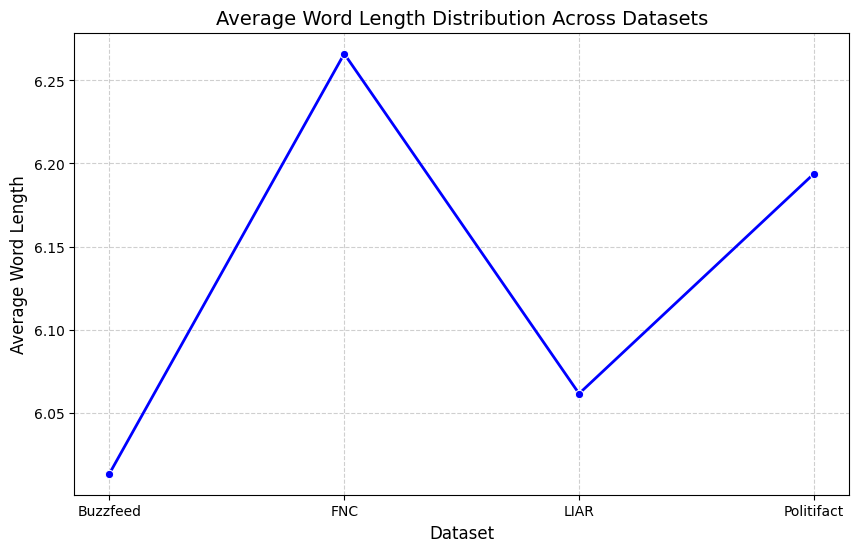

In [82]:
# Line Plot for Average Word Length Distribution

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=combined_linguistic_features,
    x="dataset", 
    y="avg_word_length", 
    marker='o', 
    ci=None, 
    linewidth=2, 
    color='blue'
)
plt.title("Average Word Length Distribution Across Datasets", fontsize=14)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Average Word Length", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [12]:
# Time Series Analysis

import plotly.express as px
import pandas as pd

# Ensure 'date' column exists and extract the 'year' in datetime format
fake_news_dataset['year'] = pd.to_datetime(fake_news_dataset['date'], errors='coerce').dt.year

# Drop rows with NaN years
year_filtered = fake_news_dataset.dropna(subset=['year'])

# Group by 'year' and count occurrences
year_counts = year_filtered['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Count']

# Step 1: Display the counts in tabular format
print("\nData Distribution by Year:")
print(year_counts.to_string(index=False))

# Step 2: Create the interactive line plot
fig = px.line(
    year_counts,
    x='Year',
    y='Count',
    title='Data Distribution Over Years',
    labels={'Year': 'Year', 'Count': 'Frequency'},
    template="plotly_white",
    markers=True  
)

# Enhance the trace aesthetics
fig.update_traces(line=dict(color='royalblue', width=3), marker=dict(size=8, color='red'))

# Add annotations for key peaks in the data 
for year, count in year_counts.iterrows():
    if count['Count'] > year_counts['Count'].quantile(0.95):  
        fig.add_annotation(
            x=count['Year'],
            y=count['Count'],
            text=f"{int(count['Count'])}",
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-30
        )

# Step 3: Update layout for better visualization
fig.update_layout(
    xaxis=dict(showgrid=True, showline=True, tickmode='linear', dtick=1),
    yaxis=dict(showgrid=True, showline=True),
    hovermode='x unified'
)

# Display the plot
fig.show()


C:\Users\ABC\AppData\Local\Temp\ipykernel_18952\2326332940.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fake_news_dataset['year'] = pd.to_datetime(fake_news_dataset['date'], errors='coerce').dt.year



Data Distribution by Year:
  Year  Count
2007.0    150
2008.0    442
2009.0    430
2010.0   1548
2011.0   1886
2012.0   1963
2013.0   1423
2014.0   1558
2015.0   1283
2016.0   1738
2017.0   1261
2018.0   1374
2019.0   1310
2020.0   2193
2021.0   1659
2022.0    934


C:\Users\ABC\AppData\Local\Temp\ipykernel_18952\521075566.py:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Label Distribution by Year (Numerical Data):
      year           label  count
0   2007.0           False     60
1   2007.0            True     10
2   2007.0     exaggerated     10
3   2007.0  partially-true     70
4   2008.0           False    105
..     ...             ...    ...
59  2021.0  partially-true    232
60  2022.0           False    643
61  2022.0            True     28
62  2022.0     exaggerated    141
63  2022.0  partially-true    122

[64 rows x 3 columns]


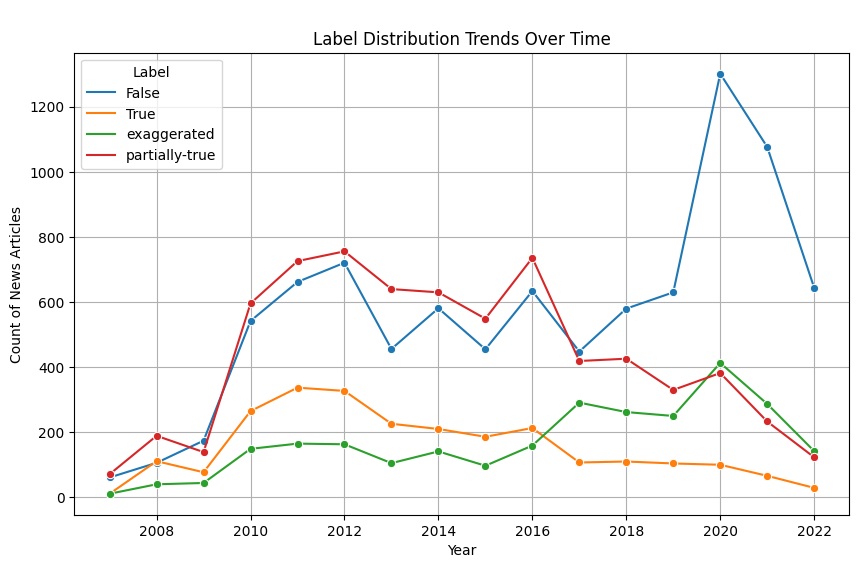

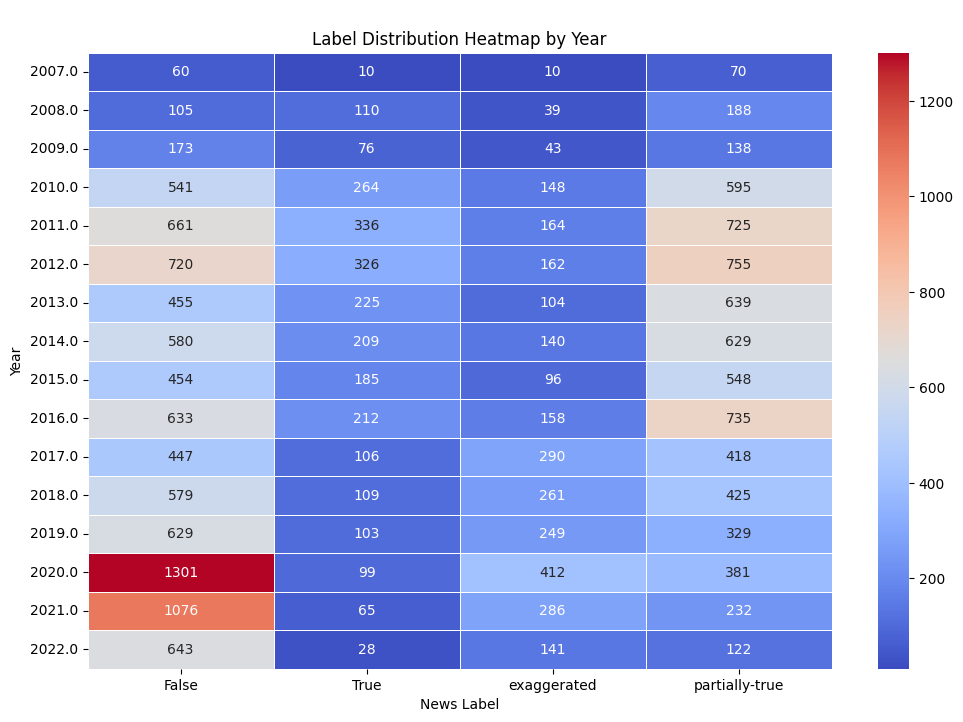

In [16]:
''' Label Distribution Analysis Over Time (Line Plot & Heatmap)
1. Summarize the yearly distribution of news labels numerically.
2. Visualize trends over time using a line plot.
3. Show the yearly label counts with a heatmap for easy comparison. '''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
fake_news_dataset['date'] = pd.to_datetime(fake_news_dataset['date'], errors='coerce')

# Extract 'year' from the 'date' column
fake_news_dataset['year'] = fake_news_dataset['date'].dt.year

# Group data by 'year' and 'label' to calculate the count of each label per year
label_distribution_by_year = fake_news_dataset.groupby(['year', 'label']).size().reset_index(name='count')

# Print the yearly label distribution for numerical insights
print("Label Distribution by Year (Numerical Data):")
print(label_distribution_by_year)

# Line Plot for Label Trends by Year
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=label_distribution_by_year,
    x='year', 
    y='count', 
    hue='label', 
    marker='o'
)
plt.title("\nLabel Distribution Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count of News Articles")
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Heatmap for Label Counts by Year
# Pivot the data to create a matrix suitable for the heatmap
heatmap_data = label_distribution_by_year.pivot(index='year', columns='label', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    fmt='g', 
    linewidths=0.5
)
plt.title("\nLabel Distribution Heatmap by Year")
plt.xlabel("News Label")
plt.ylabel("Year")
plt.show()



Top 20 Most Common Words:
unknown: 33950
the: 12372
to: 7147
of: 6815
and: 6488
a: 4991
in: 4305
that: 3283
is: 3031
for: 2140
on: 1671
with: 1586
The: 1461
are: 1450
was: 1437
as: 1432
it: 1312
be: 1281
have: 1193
I: 1170


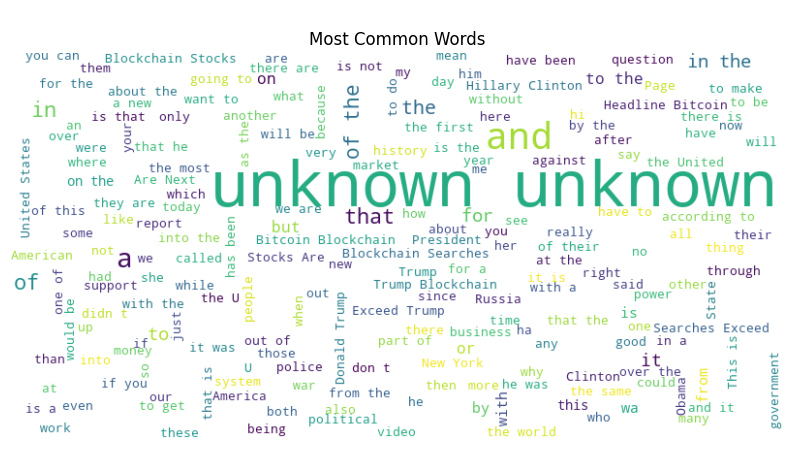

In [17]:
# Most Common Words in News Text: Insights Through Word Cloud and Frequency Analysis

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Generate word cloud
text = " ".join(fake_news_dataset['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

# Display top 20 most common words numerically
words = text.split()
common_words = Counter(words).most_common(20)

# Convert common words into a DataFrame for easy plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

print("\nTop 20 Most Common Words:")
for word, count in common_words:
    print(f"{word}: {count}")

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('\nMost Common Words')
plt.show()

# Plotting the top 20 most common words
plt.figure(figsize=(10, 6))
plt.barh(common_words_df['Word'], common_words_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'\nTop 20 Most Frequent Words in Text')
plt.gca().invert_yaxis()  
plt.show()


In [18]:
import plotly.express as px

# Ensure 'year' column is numerical and sorted
label_distribution_by_year = label_distribution_by_year.sort_values('year')

# Group the data and plot the stacked area chart
fig = px.area(
    label_distribution_by_year,
    x='year',
    y='count',
    color='label',
    title='Label Distribution Trends Over Time',
    labels={'year': 'Year', 'count': 'Frequency', 'label': 'Label'},
    template='plotly_white',
)

# Update layout for better visualization
fig.update_layout(
    title={
        'text': "Label Distribution Trends Over Time",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(showgrid=True, showline=True, tickmode='linear', dtick=1),
    yaxis=dict(showgrid=True, showline=True),
    legend_title="News Labels",
    hovermode="x unified"
)

# Add annotations for years with significant changes (optional)
for label in label_distribution_by_year['label'].unique():
    max_count_year = label_distribution_by_year[label_distribution_by_year['label'] == label].sort_values(
        'count', ascending=False
    ).iloc[0]
    fig.add_annotation(
        x=max_count_year['year'],
        y=max_count_year['count'],
        text=f"{label}: {int(max_count_year['count'])}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-30,
    )

# Display the chart
fig.show()


## Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Summary by Label:
                  count      mean       std     min    25%    50%     75%  \
label                                                                       
False           11853.0  0.000093  0.136314 -1.0000  0.000  0.000  0.0000   
True             4610.0  0.000394  0.124168 -0.9996  0.000  0.000  0.0000   
exaggerated      3752.0  0.000074  0.015326 -0.5106  0.000  0.000  0.0000   
partially-true  14142.0 -0.000042  0.040199 -0.9985  0.000  0.000  0.0000   
unknown            17.0 -0.115741  0.798420 -0.9967 -0.875 -0.296  0.8737   

                   max  
label                   
False           0.9999  
True            0.9997  
exaggerated     0.7876  
partially-true  0.9989  
unknown         0.9996  

Sentiment Counts by Label:
sentiment_category  Negative  Neutral  Positive
label                                          
False                    141    11569       143
True                      45     4518        47
exaggerated                1     375

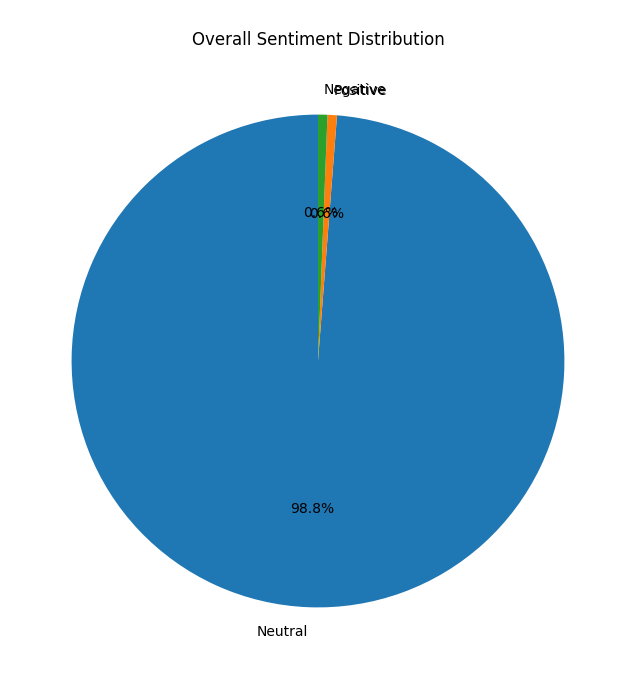

In [19]:
# Sentiment Analysis and Distribution Across News Labels

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'text' column and create a new column 'sentiment'
fake_news_dataset['sentiment'] = fake_news_dataset['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Display numerical summary of sentiment scores by label
sentiment_summary = fake_news_dataset.groupby('label')['sentiment'].describe()
print("\nSentiment Summary by Label:")
print(sentiment_summary)

# Categorize sentiment into Positive, Neutral, or Negative based on the compound score
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function
fake_news_dataset['sentiment_category'] = fake_news_dataset['sentiment'].apply(categorize_sentiment)

# Count the sentiment categories by label
sentiment_counts = fake_news_dataset.groupby(['label', 'sentiment_category']).size().unstack(fill_value=0)
print("\nSentiment Counts by Label:")
print(sentiment_counts)

# Display overall sentiment distribution numerically
overall_sentiment = fake_news_dataset['sentiment_category'].value_counts()
print("\nOverall Sentiment Distribution:")
print(overall_sentiment)

# Plot pie chart for overall sentiment distribution
plt.figure(figsize=(8, 8))
overall_sentiment.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('\nOverall Sentiment Distribution')
plt.ylabel('')  
plt.show()

# Boxplot for sentiment distribution by label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='sentiment', data=fake_news_dataset)
plt.title('Sentiment Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.show()


## Feature Selection

Feature Importances:
           Feature  Importance
2  title_sentiment    0.740129
0     title_length    0.217472
1      text_length    0.024841
3   text_sentiment    0.017558


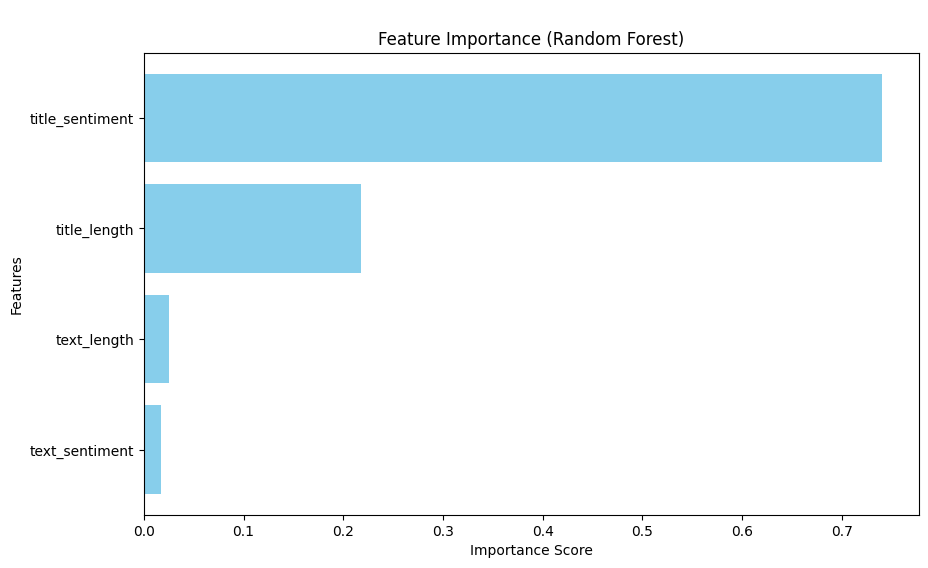

In [24]:
# Feature Importance Using Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Add Sentiment Scores to the Feature Set
# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment scores for 'title' and 'text' columns
fake_news_dataset['title_sentiment'] = fake_news_dataset['title'].apply(calculate_sentiment)
fake_news_dataset['text_sentiment'] = fake_news_dataset['text'].apply(calculate_sentiment)

# Step 2: Prepare Features and Labels
# Define the feature columns (adding sentiment scores)
features = fake_news_dataset[['title_length', 'text_length', 'title_sentiment', 'text_sentiment']]
labels = fake_news_dataset['label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Step 3: Train Random Forest for Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Step 4: Display Feature Importances
importance = pd.DataFrame({'Feature': features.columns, 'Importance': rf.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance)

# Step 5: Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.title("\nFeature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis() 
plt.show()


In [25]:
# Compute Z-Scores for Feature Standardization

from sklearn.preprocessing import StandardScaler

# Select only numeric features for standardization
numeric_features = ['title_length', 'text_length', 'title_sentiment']  # Add more numeric features if available
scaler = StandardScaler()

# Check if features exist in the dataset
numeric_features = [feature for feature in numeric_features if feature in fake_news_dataset.columns]

# Apply Z-score standardization using StandardScaler
fake_news_dataset[numeric_features] = scaler.fit_transform(fake_news_dataset[numeric_features])

# Display standardized features with mean and standard deviation
print("Standardized Numeric Features:")
for feature in numeric_features:
    mean = fake_news_dataset[feature].mean()
    std = fake_news_dataset[feature].std()
    print(f"Feature: {feature} | Mean: {mean:.2f} | Std: {std:.2f}")

# Display first few rows of the standardized features
print("\nStandardized Features (First 5 Rows):")
print(fake_news_dataset[numeric_features].head())


Standardized Numeric Features:
Feature: title_length | Mean: -0.00 | Std: 1.00
Feature: text_length | Mean: 0.00 | Std: 1.00
Feature: title_sentiment | Mean: -0.00 | Std: 1.00

Standardized Features (First 5 Rows):
   title_length  text_length  title_sentiment
0     -0.324467     5.306464        -0.212762
1     -0.550443    14.727253        -0.212762
2     -0.437455     5.730643        -0.212762
3     -0.776418     7.378736        -0.212762
4     -1.454344    -0.036845        -0.944946


In [26]:
# Variance Thresholding to Remove Low-Variance Features
# Objective: Filter out numeric features with very low variance.

from sklearn.feature_selection import VarianceThreshold

# Step 1: Select numeric features
# Add any relevant numeric features like 'text_length', 'title_length', or derived features
numeric_features = ['title_length', 'text_length', 'title_sentiment']  # Add or remove as needed
X = fake_news_dataset[numeric_features]

# Step 2: Apply Variance Thresholding
threshold = 0.01  # Threshold to identify near-constant features
selector = VarianceThreshold(threshold=threshold)
X_selected = selector.fit_transform(X)

# Step 3: Display Variance and Retained Features
feature_variances = selector.variances_
selected_features = [feature for feature, var in zip(numeric_features, feature_variances) if var >= threshold]

# Print feature variances
print("Feature Variances:")
for feature, var in zip(numeric_features, feature_variances):
    print(f"{feature}: {var:.5f}")

# Print retained features after variance thresholding
print("\nSelected Features after Variance Thresholding:")
print(selected_features)

# Step 4: Update the original dataset (optional, if needed for modeling)
fake_news_dataset_selected = fake_news_dataset[selected_features]


Feature Variances:
title_length: 1.00000
text_length: 1.00000
title_sentiment: 1.00000

Selected Features after Variance Thresholding:
['title_length', 'text_length', 'title_sentiment']


In [27]:
# Mutual Information Scores for Feature Selection
# Measures the dependency between features and the target variable, capturing non-linear relationships.

import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Selected features for MI analysis
selected_features = [
    'title_length',
    'text_length',
    'title_word_count',
    'text_word_count',
    'average_word_length',
    'unique_word_count',
    'text_sentiment',
    'text_subjectivity',
    'year'
]

# Step 1: Verify and Handle Missing Features
existing_features = [feature for feature in selected_features if feature in fake_news_dataset.columns]
missing_features = [feature for feature in selected_features if feature not in fake_news_dataset.columns]

# Log missing features
if missing_features:
    print(f"Warning: The following features are missing and will be excluded: {missing_features}")

# Step 2: Prepare the Feature Matrix and Target Variable
X = fake_news_dataset[existing_features].copy()

# Handle missing values by replacing NaN with 0
X = X.fillna(0)

# Encode the target variable numerically for MI computation
y = fake_news_dataset['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Compute Mutual Information Scores
mi_scores = mutual_info_classif(X, y_encoded, random_state=42)

# Step 4: Create a DataFrame for Mutual Information Scores
mi_scores_df = pd.DataFrame({'Feature': existing_features, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)
mi_scores_df.reset_index(drop=True, inplace=True)
mi_scores_df.index += 1  # Adjust numbering to start from 1

# Print Mutual Information Scores
print("Mutual Information Scores (Selected Features):")
print(mi_scores_df)

# Step 5: Visualize Mutual Information Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_scores_df, palette='viridis')
plt.title("\nMutual Information Scores for Selected Features")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.show()


Mutual Information Scores (Selected Features):
          Feature  MI Score
1            year  0.070024
2     text_length  0.011879
3  text_sentiment  0.009814
4    title_length  0.002719


ANOVA F-test Results:
          Feature     F-Score        P-Value
3            year  641.981762   0.000000e+00
2  text_sentiment  269.210627  2.975930e-228
1     text_length  249.499228  1.151031e-211
0    title_length   79.597010   2.409098e-67


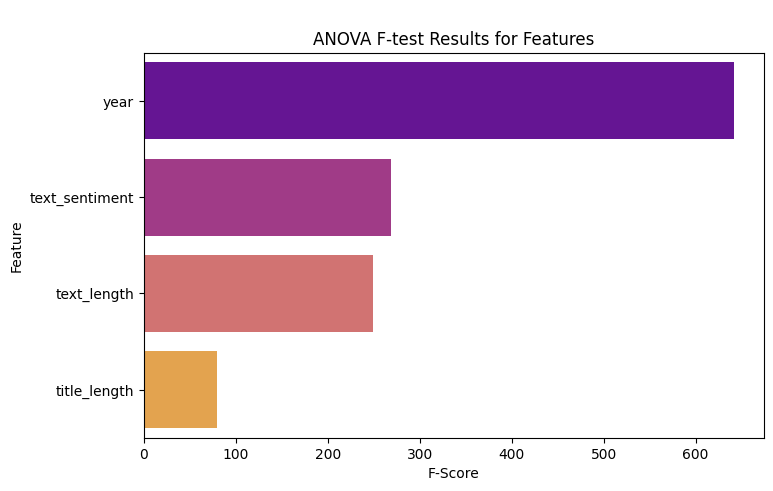

In [29]:
# Univariate Feature Selection Using ANOVA F-test

from sklearn.feature_selection import f_classif

# ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Display results
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'P-Value': p_values})
anova_results = anova_results.sort_values(by='F-Score', ascending=False)

print("ANOVA F-test Results:")
print(anova_results)

# Visualize F-scores
plt.figure(figsize=(8, 5))
sns.barplot(x='F-Score', y='Feature', data=anova_results, palette='plasma')
plt.title("\nANOVA F-test Results for Features")
plt.show()
